In [48]:
#import
import os
import numpy as np
import pandas as pd
import re
import itertools
from collections import Counter
import pickle
import jieba
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
from pprint import pprint


# Reading the files

In [105]:
#--reading the texts files
le_chemin = 'cleaned_articles'  # write the texts folder path

filenames = os.listdir(le_chemin)

#print(filenames)


texts_list = []  # create an empty list to save all the texts inside

for filename in sorted(os.listdir(le_chemin)):  # for all file names in folder subtitles in order
    #ignore hidden files
    if filename[0] != '.':

        file_path = os.path.join(le_chemin, filename)  # Create path with folder path and file names

        print(file_path) #to check if the order is correct
        with open(file_path, 'r') as f2:
            data = f2.read() #take the text in the file

        texts_list.append(data)  # add it to the list

#print(texts_list[8])


cleaned_articles/1.txt
cleaned_articles/10.txt
cleaned_articles/100.txt
cleaned_articles/1000.txt
cleaned_articles/1001.txt
cleaned_articles/1002.txt
cleaned_articles/1003.txt
cleaned_articles/1004.txt
cleaned_articles/1005.txt
cleaned_articles/1006.txt
cleaned_articles/1007.txt
cleaned_articles/1008.txt
cleaned_articles/1009.txt
cleaned_articles/101.txt
cleaned_articles/1010.txt
cleaned_articles/1011.txt
cleaned_articles/1012.txt
cleaned_articles/1013.txt
cleaned_articles/1014.txt
cleaned_articles/1015.txt
cleaned_articles/1016.txt
cleaned_articles/1017.txt
cleaned_articles/1018.txt
cleaned_articles/1019.txt
cleaned_articles/102.txt
cleaned_articles/1020.txt
cleaned_articles/1021.txt
cleaned_articles/1022.txt
cleaned_articles/1023.txt
cleaned_articles/1024.txt
cleaned_articles/1025.txt
cleaned_articles/1026.txt
cleaned_articles/1027.txt
cleaned_articles/1028.txt
cleaned_articles/1029.txt
cleaned_articles/103.txt
cleaned_articles/1030.txt
cleaned_articles/1031.txt
cleaned_articles/1032

cleaned_articles/1540.txt
cleaned_articles/1541.txt
cleaned_articles/1542.txt
cleaned_articles/1543.txt
cleaned_articles/1544.txt
cleaned_articles/1545.txt
cleaned_articles/1546.txt
cleaned_articles/1547.txt
cleaned_articles/1548.txt
cleaned_articles/1549.txt
cleaned_articles/155.txt
cleaned_articles/1550.txt
cleaned_articles/1551.txt
cleaned_articles/1552.txt
cleaned_articles/1553.txt
cleaned_articles/1554.txt
cleaned_articles/1555.txt
cleaned_articles/1556.txt
cleaned_articles/1557.txt
cleaned_articles/1558.txt
cleaned_articles/1559.txt
cleaned_articles/156.txt
cleaned_articles/1560.txt
cleaned_articles/1561.txt
cleaned_articles/1562.txt
cleaned_articles/1563.txt
cleaned_articles/1564.txt
cleaned_articles/1565.txt
cleaned_articles/1566.txt
cleaned_articles/1567.txt
cleaned_articles/1568.txt
cleaned_articles/1569.txt
cleaned_articles/157.txt
cleaned_articles/1570.txt
cleaned_articles/1571.txt
cleaned_articles/1572.txt
cleaned_articles/1573.txt
cleaned_articles/1574.txt
cleaned_article

cleaned_articles/2110.txt
cleaned_articles/2111.txt
cleaned_articles/2112.txt
cleaned_articles/2113.txt
cleaned_articles/2114.txt
cleaned_articles/2115.txt
cleaned_articles/2116.txt
cleaned_articles/2117.txt
cleaned_articles/2118.txt
cleaned_articles/2119.txt
cleaned_articles/212.txt
cleaned_articles/2120.txt
cleaned_articles/2121.txt
cleaned_articles/2122.txt
cleaned_articles/2123.txt
cleaned_articles/2124.txt
cleaned_articles/2125.txt
cleaned_articles/2126.txt
cleaned_articles/2127.txt
cleaned_articles/2128.txt
cleaned_articles/2129.txt
cleaned_articles/213.txt
cleaned_articles/2130.txt
cleaned_articles/2131.txt
cleaned_articles/2132.txt
cleaned_articles/2133.txt
cleaned_articles/2134.txt
cleaned_articles/2135.txt
cleaned_articles/2136.txt
cleaned_articles/2137.txt
cleaned_articles/2138.txt
cleaned_articles/2139.txt
cleaned_articles/214.txt
cleaned_articles/2140.txt
cleaned_articles/2141.txt
cleaned_articles/2142.txt
cleaned_articles/2143.txt
cleaned_articles/2144.txt
cleaned_article

cleaned_articles/2682.txt
cleaned_articles/2683.txt
cleaned_articles/2684.txt
cleaned_articles/2685.txt
cleaned_articles/2686.txt
cleaned_articles/2687.txt
cleaned_articles/2688.txt
cleaned_articles/2689.txt
cleaned_articles/269.txt
cleaned_articles/2690.txt
cleaned_articles/2691.txt
cleaned_articles/2692.txt
cleaned_articles/2693.txt
cleaned_articles/2694.txt
cleaned_articles/2695.txt
cleaned_articles/2696.txt
cleaned_articles/2697.txt
cleaned_articles/2698.txt
cleaned_articles/2699.txt
cleaned_articles/27.txt
cleaned_articles/270.txt
cleaned_articles/2700.txt
cleaned_articles/2701.txt
cleaned_articles/2702.txt
cleaned_articles/2703.txt
cleaned_articles/2704.txt
cleaned_articles/2705.txt
cleaned_articles/2706.txt
cleaned_articles/2707.txt
cleaned_articles/2708.txt
cleaned_articles/2709.txt
cleaned_articles/271.txt
cleaned_articles/2710.txt
cleaned_articles/2711.txt
cleaned_articles/2712.txt
cleaned_articles/2713.txt
cleaned_articles/2714.txt
cleaned_articles/2715.txt
cleaned_articles/

cleaned_articles/3250.txt
cleaned_articles/3251.txt
cleaned_articles/3252.txt
cleaned_articles/3253.txt
cleaned_articles/3254.txt
cleaned_articles/3255.txt
cleaned_articles/3256.txt
cleaned_articles/3257.txt
cleaned_articles/3258.txt
cleaned_articles/3259.txt
cleaned_articles/326.txt
cleaned_articles/3260.txt
cleaned_articles/3261.txt
cleaned_articles/3262.txt
cleaned_articles/3263.txt
cleaned_articles/3264.txt
cleaned_articles/3265.txt
cleaned_articles/3266.txt
cleaned_articles/3267.txt
cleaned_articles/3268.txt
cleaned_articles/3269.txt
cleaned_articles/327.txt
cleaned_articles/3270.txt
cleaned_articles/3271.txt
cleaned_articles/3272.txt
cleaned_articles/3273.txt
cleaned_articles/3274.txt
cleaned_articles/3275.txt
cleaned_articles/3276.txt
cleaned_articles/3277.txt
cleaned_articles/3278.txt
cleaned_articles/3279.txt
cleaned_articles/328.txt
cleaned_articles/3280.txt
cleaned_articles/3281.txt
cleaned_articles/3282.txt
cleaned_articles/3283.txt
cleaned_articles/3284.txt
cleaned_article

cleaned_articles/3810.txt
cleaned_articles/3811.txt
cleaned_articles/3812.txt
cleaned_articles/3813.txt
cleaned_articles/3814.txt
cleaned_articles/3815.txt
cleaned_articles/3816.txt
cleaned_articles/3817.txt
cleaned_articles/3818.txt
cleaned_articles/3819.txt
cleaned_articles/382.txt
cleaned_articles/3820.txt
cleaned_articles/3821.txt
cleaned_articles/3822.txt
cleaned_articles/3823.txt
cleaned_articles/3824.txt
cleaned_articles/3825.txt
cleaned_articles/3826.txt
cleaned_articles/3827.txt
cleaned_articles/3828.txt
cleaned_articles/3829.txt
cleaned_articles/383.txt
cleaned_articles/3830.txt
cleaned_articles/3831.txt
cleaned_articles/3832.txt
cleaned_articles/3833.txt
cleaned_articles/3834.txt
cleaned_articles/3835.txt
cleaned_articles/3836.txt
cleaned_articles/3837.txt
cleaned_articles/3838.txt
cleaned_articles/3839.txt
cleaned_articles/384.txt
cleaned_articles/3840.txt
cleaned_articles/3841.txt
cleaned_articles/3842.txt
cleaned_articles/3843.txt
cleaned_articles/3844.txt
cleaned_article

cleaned_articles/4403.txt
cleaned_articles/4404.txt
cleaned_articles/4405.txt
cleaned_articles/4406.txt
cleaned_articles/4407.txt
cleaned_articles/4408.txt
cleaned_articles/4409.txt
cleaned_articles/441.txt
cleaned_articles/4410.txt
cleaned_articles/4411.txt
cleaned_articles/4412.txt
cleaned_articles/4413.txt
cleaned_articles/4414.txt
cleaned_articles/4415.txt
cleaned_articles/4416.txt
cleaned_articles/4417.txt
cleaned_articles/4418.txt
cleaned_articles/4419.txt
cleaned_articles/442.txt
cleaned_articles/4420.txt
cleaned_articles/4421.txt
cleaned_articles/4422.txt
cleaned_articles/4423.txt
cleaned_articles/4424.txt
cleaned_articles/4425.txt
cleaned_articles/4426.txt
cleaned_articles/4427.txt
cleaned_articles/4428.txt
cleaned_articles/4429.txt
cleaned_articles/443.txt
cleaned_articles/4430.txt
cleaned_articles/4431.txt
cleaned_articles/4432.txt
cleaned_articles/4433.txt
cleaned_articles/4434.txt
cleaned_articles/4435.txt
cleaned_articles/4436.txt
cleaned_articles/4437.txt
cleaned_article

cleaned_articles/969.txt
cleaned_articles/97.txt
cleaned_articles/970.txt
cleaned_articles/971.txt
cleaned_articles/972.txt
cleaned_articles/973.txt
cleaned_articles/974.txt
cleaned_articles/975.txt
cleaned_articles/976.txt
cleaned_articles/977.txt
cleaned_articles/978.txt
cleaned_articles/979.txt
cleaned_articles/98.txt
cleaned_articles/980.txt
cleaned_articles/981.txt
cleaned_articles/982.txt
cleaned_articles/983.txt
cleaned_articles/984.txt
cleaned_articles/985.txt
cleaned_articles/986.txt
cleaned_articles/987.txt
cleaned_articles/988.txt
cleaned_articles/989.txt
cleaned_articles/99.txt
cleaned_articles/990.txt
cleaned_articles/991.txt
cleaned_articles/992.txt
cleaned_articles/993.txt
cleaned_articles/994.txt
cleaned_articles/995.txt
cleaned_articles/996.txt
cleaned_articles/997.txt
cleaned_articles/998.txt
cleaned_articles/999.txt


# cutting words

In [4]:
seg_list = []
for t in texts_list:
    t = jieba.lcut(t)
    seg_list.append(t)

print(seg_list[8])


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.472 seconds.
Prefix dict has been built successfully.


['不仅', '是', '百步亭', '疫情', '之下', '基层', '到底', '怎么样', '\n', '不仅', '是', '百步亭', '疫情', '之下', '基层', '到底', '怎么样', '不仅', '是', '百步亭', '疫情', '之下', '基层', '到底', '怎么样', '不仅', '是', '百步亭', '疫情', '之下', '基层', '到底', '怎么样', '冰点', '周刊', '冰点', '周刊', '中国青年报', '旗下', '的', '深度', '报道', '品牌', '我们', '相信', '新闻', '不止', '一天', '的', '生命力', '守候', '微光', '中国青年报', '守候', '微光', '大家', '一起', '凝视', '的', '既', '是', '我们', '的', '生活', '也', '是', '历史', '的', '脉络', '中国青年报', '摄影部', '公众', '平台', '生产', '真诚', '严肃', '的', '社会', '纪实', '摄影', '品读', '新鲜', '有益', '的', '全球', '视觉', '资讯', '帮助', '年轻', '的', '你', '看', '身旁', '看', '远方', '月', '日', '武汉', '百步亭', '社区', '接到', '通知', '的', '志愿者', '司机', '准备', '开车', '送轻症', '患者', '去', '方舱', '医院', '李', '峥', '苨', '摄', '月', '日', '武汉', '百步亭', '社区', '三', '居委会', '内', '工作人员', '分装', '消毒', '泡腾片', '准备', '分', '发给', '社区', '居民', '李', '峥', '苨', '摄', '采访', '中青报', '中青网', '记者', '李', '峥', '苨', '通讯员', '王勇', '陈', '雄鹰', '主笔', '曲俊燕', '月', '日', '经历', '数日', '阴雨', '的', '武汉', '终于', '放晴', '百步亭', '社区', '有', '居民', '出门', '取菜', '买药', '也', '有人', '绕',

prepare to lda

In [ ]:
didi = gensim.corpora.Dictionary(seg_list)

didi.filter_extremes(no_above= 0.17)


bow_corpus = [didi.doc2bow(doc) for doc in seg_list]

# LDAying

In [6]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=didi)

Then display the results

In [7]:
topic_dic = dict()
for idx, topic in lda_model.print_topics(-1):
    topic_dic['topic {}'.format(idx)] = topic.split('+')
pd.DataFrame(topic_dic)

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,"0.004*""\t""","0.003*""\t""","0.006*""\t""","0.004*""\t""","0.002*""财新""","0.004*""方方""","0.003*""意大利""","0.003*""财新""","0.003*""昼""","0.003*""\t"""
1,"0.003*""财新""","0.002*""财新""","0.005*""财新""","0.003*""意大利""","0.002*""\t""","0.003*""财新""","0.003*""\t""","0.002*""\t""","0.003*""\t""","0.002*""伊朗"""
2,"0.002*""意大利""","0.002*""财新网""","0.003*""财新网""","0.002*""财新""","0.001*""举报""","0.003*""作家""","0.002*""财新""","0.001*""о""","0.003*""财新""","0.002*""财新"""
3,"0.002*""财新网""","0.002*""意大利""","0.003*""意大利""","0.002*""妈妈""","0.001*""意大利""","0.003*""\t""","0.002*""英国""","0.001*""е""","0.002*""韩国""","0.001*""登录"""
4,"0.001*""登录""","0.001*""方舱""","0.002*""韩国""","0.002*""疫苗""","0.001*""华南""","0.002*""财新网""","0.001*""感染者""","0.001*""邮轮""","0.002*""意大利""","0.001*""财新网"""
5,"0.001*""伊朗""","0.001*""登录""","0.002*""方舱""","0.001*""财新网""","0.001*""疫苗""","0.002*""登录""","0.001*""韩国""","0.001*""а""","0.002*""方舱""","0.001*""疾控中心"""
6,"0.001*""疫苗""","0.001*""消费""","0.002*""伊朗""","0.001*""方舱""","0.001*""父亲""","0.001*""意大利""","0.001*""方舱""","0.001*""财新网""","0.002*""财新网""","0.001*""意大利"""
7,"0.001*""德国""","0.001*""诊断""","0.001*""李文亮""","0.001*""登录""","0.001*""方舱""","0.001*""博客""","0.001*""爸爸""","0.001*""方舱""","0.001*""父亲""","0.001*""李文亮"""
8,"0.001*"" ""","0.001*""学生""","0.001*""感染者""","0.001*""澎湃""","0.001*""妈妈""","0.001*""方舱""","0.001*""疾控中心""","0.001*""司机""","0.001*""妻子""","0.001*""方方"""
9,"0.001*""杂志""","0.001*""妈妈""","0.001*""登录""","0.001*"" ""","0.001*""女儿""","0.001*""父亲""","0.001*""财新网""","0.001*""н""","0.001*""疾控中心""","0.001*""杂志"""


In [8]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=didi)

topic_dic = dict()
for idx, topic in lda_model.print_topics(-1):
    topic_dic['topic {}'.format(idx)] = topic.split('+')
pd.DataFrame(topic_dic)

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,"0.005*""\t""","0.002*""昼""","0.003*""\t""","0.002*""意大利""","0.003*""\t""","0.004*""财新""","0.004*""\t""","0.003*""\t""","0.003*""\t""","0.006*""\t"""
1,"0.003*""财新""","0.002*""财新""","0.003*""财新""","0.002*""财新""","0.003*""财新""","0.004*""\t""","0.002*""财新""","0.002*""财新""","0.002*""财新""","0.005*""财新"""
2,"0.002*""意大利""","0.002*""韩国""","0.002*""昼""","0.002*""作家""","0.002*""财新网""","0.002*""财新网""","0.002*""意大利""","0.001*""意大利""","0.001*""意大利""","0.004*""意大利"""
3,"0.002*""方舱""","0.002*""方舱""","0.002*""方方""","0.002*""\t""","0.002*""疫苗""","0.002*""方舱""","0.001*""财新网""","0.001*""财新网""","0.001*""财新网""","0.002*""财新网"""
4,"0.002*""父亲""","0.002*""\t""","0.001*""财新网""","0.001*""心理""","0.001*""方方""","0.001*""登录""","0.001*""韩国""","0.001*""韩国""","0.001*""伊朗""","0.002*""伊朗"""
5,"0.002*""财新网""","0.001*""财新网""","0.001*""妈妈""","0.001*""监狱""","0.001*""产品""","0.001*""作家""","0.001*""杂志""","0.001*""父亲""","0.001*""疫苗""","0.002*""登录"""
6,"0.001*""李文亮""","0.001*""意大利""","0.001*""学生""","0.001*""财新网""","0.001*""感染者""","0.001*""意大利""","0.001*""香港""","0.001*""华南""","0.001*""韩国""","0.002*""方舱"""
7,"0.001*""学生""","0.001*""诊断""","0.001*""英国""","0.001*""方舱""","0.001*""意大利""","0.001*""疾控中心""","0.001*""药物""","0.001*""求助""","0.001*""妈妈""","0.001*"" """
8,"0.001*""伊朗""","0.001*""李文亮""","0.001*""作家""","0.001*""药物""","0.001*""汽车""","0.001*""方方""","0.001*""医用""","0.001*""方舱""","0.001*"" ""","0.001*""方方"""
9,"0.001*""疫苗""","0.001*""医用""","0.001*""登录""","0.001*""韩国""","0.001*""工人""","0.001*""伊朗""","0.001*""方舱""","0.001*""非典""","0.001*""方舱""","0.001*""妈妈"""


We can see that there is potential but it is far from perfect. Before trying to change the number of topics, we need to remove some stopwords. We are going to use general stopwords but also add our own. Mostly, in this analysis, we are not interested in the name of the media who published the article like: 财新网, 作家方方,...
However, in order to remove them properly, we need to be sure that they are cut properly in the first place.

In [17]:
with open('UsrWords.txt', 'r', encoding='utf8') as f:
    custom_noun = f.readlines()
    for noun in custom_noun:
        jieba.add_word(noun.replace('\n', ''), freq=None, tag='n')

check in which article 方方 appear

In [16]:

lst = []


for i in seg_list:
    for word in i:
        if word == '方方':
            x =seg_list.index(i)
            lst.append(x)
            
lst =list(dict.fromkeys(lst))

print(lst)
print(len(lst))

            

[6, 142, 143, 144, 147, 149, 150, 151, 152, 153, 154, 163, 177, 178, 226, 294, 304, 315, 316, 317, 318, 328, 430, 502, 592, 613, 614, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 643, 644, 645, 646, 701, 856, 860, 861, 862, 863, 889, 896, 962, 967, 982, 1006, 1014, 1047, 1080, 1082, 1083, 1091, 1096, 1166, 1167, 1218, 1219, 1222, 1233, 1301, 1309, 1310, 1311, 1312, 1313, 1318, 1320, 1375, 1380, 1381, 1393, 1394, 1397, 1398, 1399, 1438, 1439, 1442, 1443, 1444, 1469, 1484, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1590, 1593, 1604, 1628, 1629, 1674, 1675, 1676, 1677, 1678, 1679, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1703, 1716, 1722, 1728, 1729, 1730, 1841, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1857, 1858, 1859, 1870, 1903, 1904, 1905, 1906, 1966, 1970, 1971, 1972, 1973, 1974, 1975, 1979, 1981, 1986, 2000, 205

While doing that we can also see that Fangfang appear in 385 articles. Now let's print one article before cutting again

In [11]:
print(seg_list[6])

['作家', '方方', '或许', '那时', '他们', '才', '会', '懂得', '百姓', '作家', '方方', '财新', '博客', '新世纪', '的', '常识', '传播者', '财新网', '\n', '作家', '方方', '或许', '那时', '他们', '才', '会', '懂得', '百姓', '作家', '方方', '财新', '博客', '新世纪', '的', '常识', '传播者', '财新网', '作家', '方方', '或许', '那时', '他们', '才', '会', '懂得', '百姓', '作家', '方方', '财新', '博客', '新世纪', '的', '常识', '传播者', '财新网', '财新', '商城', '\n', '登录', '\n', '注册', '财新网', '首页', '经济', '金融公司', '政经', '世界', '观点', '网', '文化', '博客', '作家', '方方', '的', '博客', '位置', '博客', '作家', '方方', '作家', '方方', '或许', '那时', '他们', '才', '会', '懂得', '百姓', '作家', '方方', '或许', '那时', '他们', '才', '会', '懂得', '百姓', '年月日', '分类', '点滴', '标签', '新冠', '肺炎', '防疫', '阅读', '评论', '正月', '二十', '中午', '开窗', '看到', '太阳', '又', '出来', '了', '今天', '是', '李文亮', '的', '头', '七', '吧', '头', '七', '是', '远', '行者', '回望', '的', '日子', '李文亮', '在天有灵', '重返', '故地', '他会', '看到', '什么', '呢', '从', '昨晚', '起闷', '了', '两天', '的', '网络', '突然', '又', '活跃', '起来', '长江日报', '以', '三篇', '魔', '魅式', '短文', '瞬间', '刺激', '到', '诸多', '人', '的', '大脑皮层', '看', '了', '它们', '大家', '觉得', '自己', '似乎', '又'

and cut again

In [18]:
seg_list = []
for t in texts_list:
    t = jieba.lcut(t)
    seg_list.append(t)

print(seg_list[6])

['作家方方', '或许', '那时', '他们', '才', '会', '懂得', '百姓', '作家方方', '财新', '博客', '新世纪', '的', '常识', '传播者', '财新网', '\n', '作家方方', '或许', '那时', '他们', '才', '会', '懂得', '百姓', '作家方方', '财新', '博客', '新世纪', '的', '常识', '传播者', '财新网', '作家方方', '或许', '那时', '他们', '才', '会', '懂得', '百姓', '作家方方', '财新', '博客', '新世纪', '的', '常识', '传播者', '财新网', '财新', '商城', '\n', '登录', '\n', '注册', '财新网', '首页', '经济', '金融公司', '政经', '世界', '观点', '网', '文化', '博客', '作家方方的博客', '位置', '博客', '作家方方', '作家方方', '或许', '那时', '他们', '才', '会', '懂得', '百姓', '作家方方', '或许', '那时', '他们', '才', '会', '懂得', '百姓', '年月日', '分类', '点滴', '标签', '新冠', '肺炎', '防疫', '阅读', '评论', '正月', '二十', '中午', '开窗', '看到', '太阳', '又', '出来', '了', '今天', '是', '李文亮', '的', '头', '七', '吧', '头', '七', '是', '远', '行者', '回望', '的', '日子', '李文亮', '在天有灵', '重返', '故地', '他会', '看到', '什么', '呢', '从', '昨晚', '起闷', '了', '两天', '的', '网络', '突然', '又', '活跃', '起来', '长江日报', '以', '三篇', '魔', '魅式', '短文', '瞬间', '刺激', '到', '诸多', '人', '的', '大脑皮层', '看', '了', '它们', '大家', '觉得', '自己', '似乎', '又', '有', '了', '活力', '这', '活力', '来自', '想要', '骂人', '

Failed the first time because media is actually called 作家方方的博客 but articles always begins with 作家方方. I then added 作家方方 in the list and checked the list more carefully to write media names with / in two lines. It worked very well after that. Since it is cut properly, we can move on to remove the words.

In [28]:
fh = open("stopwords.txt")
stopwords=[]
for line in fh:
    line = line.rstrip()
    stopwords.append(line)

In [29]:
ns_list = []

for t in seg_list:
    lili=[]
    for word in t:
        if word not in stopwords:
            lili.append(word)
    ns_list.append(lili)
    
    
#print(ns_list[6])

Now let's also remove the '/n' with regex. I left it for the first cleaning hoping that it would help for cutting.

In [ ]:
def nettoyage(text):
    text = re.sub("[A-Za-z0-9\!\=\？\%\[\]\,\（\）\>\<:&lt;\/#\. -----\_「」←→·•；]", "", text)
    text = re.sub("\n","",text)
    return text

prepare to lda again

In [33]:
didi = gensim.corpora.Dictionary(ns_list)

didi.filter_extremes(no_above= 0.3)


bow_corpus = [didi.doc2bow(doc) for doc in seg_list]

ldaying and display result

In [34]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=didi)

In [35]:
topic_dic = dict()
for idx, topic in lda_model.print_topics(-1):
    topic_dic['topic {}'.format(idx)] = topic.split('+')
pd.DataFrame(topic_dic)

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,topic 11,topic 12,topic 13,topic 14,topic 15,topic 16,topic 17,topic 18,topic 19
0,"0.003*""\t""","0.002*""\t""","0.003*""伊朗""","0.003*""\t""","0.004*""\t""","0.002*""复工""","0.005*""昼""","0.003*""\t""","0.003*""\t""","0.004*""\t""","0.002*""评论""","0.002*""\t""","0.003*""新增""","0.002*""美国""","0.004*""\t""","0.004*""复工""","0.003*""\t""","0.003*""\t""","0.004*""\t""","0.002*""重症"""
1,"0.003*""意大利""","0.002*""护士""","0.003*""评论""","0.002*""意大利""","0.002*""美国""","0.002*""美国""","0.004*""美国""","0.003*""评论""","0.003*""美国""","0.003*""评论""","0.002*""美国""","0.002*""评论""","0.003*""韩国""","0.002*""核酸""","0.002*""评论""","0.003*""酒店""","0.003*""意大利""","0.002*""评论""","0.002*""意大利""","0.002*""发热"""
2,"0.002*""美国""","0.002*""新增""","0.002*""\t""","0.002*""新增""","0.002*""评论""","0.002*""\t""","0.003*""意大利""","0.003*""美国""","0.002*""回复""","0.002*""重症""","0.002*""复工""","0.002*""回复""","0.002*""美国""","0.002*""\t""","0.002*""美国""","0.002*""\t""","0.002*""小区""","0.002*""重症""","0.002*""美国""","0.002*""国内"""
3,"0.002*""复工""","0.001*""评论""","0.002*""代表""","0.002*""李文亮""","0.001*""核酸""","0.002*""意大利""","0.002*""新增""","0.002*""复工""","0.002*""员工""","0.002*""美国""","0.002*""\t""","0.002*""美国""","0.002*""生产""","0.001*""护士""","0.001*""小区""","0.002*""志愿者""","0.002*""评论""","0.001*""意大利""","0.002*""评论""","0.002*""\t"""
4,"0.002*""评论""","0.001*""美国""","0.002*""分享""","0.002*""累计""","0.001*""传染病""","0.002*""酒店""","0.001*""\t""","0.002*""生产""","0.002*""评论""","0.002*""复工""","0.002*""回复""","0.002*""孩子""","0.002*""累计""","0.001*""重症""","0.001*""新增""","0.002*""孩子""","0.002*""美国""","0.001*""新增""","0.002*""生产""","0.002*""德国"""
5,"0.002*""伊朗""","0.001*""孩子""","0.002*""酒店""","0.002*""志愿者""","0.001*""防护服""","0.002*""新增""","0.001*""防护服""","0.002*""员工""","0.002*""日本""","0.002*""新增""","0.002*""湖北省""","0.002*""复工""","0.002*""评论""","0.001*""小区""","0.001*""复工""","0.002*""评论""","0.002*""累计""","0.001*""志愿者""","0.002*""方舱""","0.001*""万"""
6,"0.002*""重症""","0.001*""小区""","0.002*""志愿者""","0.002*""美国""","0.001*""临床""","0.002*""日本""","0.001*""酒店""","0.001*""回复""","0.002*""疫苗""","0.002*""回复""","0.001*""新增""","0.001*""发热""","0.002*""\t""","0.001*""发热""","0.001*""累计""","0.001*""发热""","0.002*""孩子""","0.001*""日记""","0.002*""政策""","0.001*""志愿者"""
7,"0.002*""累计""","0.001*""发热""","0.002*""意大利""","0.002*""重症""","0.001*""发热""","0.002*""英国""","0.001*""重症""","0.001*""新增""","0.001*""复工""","0.001*""发热""","0.001*""重症""","0.001*""新增""","0.002*""意大利""","0.001*""出院""","0.001*""酒店""","0.001*""防护服""","0.002*""发热""","0.001*""香港""","0.002*""重症""","0.001*""母亲"""
8,"0.002*""韩国""","0.001*""志愿者""","0.001*""回复""","0.001*""发热""","0.001*""团队""","0.002*""伊朗""","0.001*""护士""","0.001*""小区""","0.001*""发热""","0.001*""出院""","0.001*""发热""","0.001*""意大利""","0.002*""发热""","0.001*""回""","0.001*""防护服""","0.001*""母亲""","0.001*""复工""","0.001*""美国""","0.001*""分享""","0.001*""核酸"""
9,"0.002*""新增""","0.001*""传染病""","0.001*""同事""","0.001*""回复""","0.001*""新增""","0.001*""方舱""","0.001*""国内""","0.001*""方舱""","0.001*""行业""","0.001*""日记""","0.001*""生产""","0.001*""生产""","0.002*""复工""","0.001*""评论""","0.001*""行业""","0.001*""护士""","0.001*""登录""","0.001*""护士""","0.001*""员工""","0.001*""新增"""


In [41]:
pprint(lda_model.print_topics())

TypeError: 'module' object is not callable

In [42]:
doc_lda = lda_model[bow_corpus]

In [44]:
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))


Perplexity:  -9.687737779242656


In [51]:
coherence_model_lda = CoherenceModel(
   model=lda_model, texts=ns_list, dictionary=didi, coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.27318647380553895


In [52]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, didi)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.006360  0.005785       1        1  13.253418
2     -0.000731  0.007608       2        1   7.975970
9     -0.003337  0.005940       3        1   7.923214
0     -0.008760 -0.004369       4        1   7.401666
4     -0.002194  0.002382       5        1   6.685726
12    -0.004769 -0.008945       6        1   6.572267
13     0.006169  0.002011       7        1   5.900623
6      0.006347 -0.010460       8        1   5.675377
18    -0.007239  0.000348       9        1   5.465145
19     0.006047  0.000063      10        1   4.558584
3      0.000143  0.001509      11        1   4.500270
5      0.003463 -0.009069      12        1   4.328127
1      0.003535  0.003151      13        1   3.050659
16    -0.002578  0.000933      14        1   2.966999
10     0.005378 -0.000199      15        1   2.869674
8     -0.002857 -0.000308      16        1   2.742616
7     -0.005184 -0.000384      17        1   2.308761
17     0.005999  0.000153      18        1   2.140362
11    -0.002763  0.001531      19        1   1.885776
14    -0.003030  0.002319      20        1   1.794766, topic_info=      Term          Freq         Total Category  logprob  loglift
32294    昼   1381.000000   1381.000000  Default  30.0000  30.0000
12805   \t  10287.000000  10287.000000  Default  29.0000  29.0000
524     美国   7149.000000   7149.000000  Default  28.0000  28.0000
558     评论   6866.000000   6866.000000  Default  27.0000  27.0000
7464   意大利   5620.000000   5620.000000  Default  26.0000  26.0000
227     回复   3927.000000   3927.000000  Default  25.0000  25.0000
1771    复工   6726.000000   6726.000000  Default  24.0000  24.0000
282     小区   4069.000000   4069.000000  Default  23.0000  23.0000
3808    新增   5727.000000   5727.000000  Default  22.0000  22.0000
2828    伊朗   3110.000000   3110.000000  Default  21.0000  21.0000
2695    疫苗   2366.000000   2366.000000  Default  20.0000  20.0000
470     生产   4034.000000   4034.000000  Default  19.0000  19.0000
7621    韩国   3703.000000   3703.000000  Default  18.0000  18.0000
1265    发热   4933.000000   4933.000000  Default  17.0000  17.0000
1793    孩子   4332.000000   4332.000000  Default  16.0000  16.0000
216     员工   4035.000000   4035.000000  Default  15.0000  15.0000
32299    о    440.000000    440.000000  Default  14.0000  14.0000
4577    累计   3952.000000   3952.000000  Default  13.0000  13.0000
32287    е    413.000000    413.000000  Default  12.0000  12.0000
2769    重症   5276.000000   5276.000000  Default  11.0000  11.0000
547     行业   3189.000000   3189.000000  Default  10.0000  10.0000
2826    代表   3592.000000   3592.000000  Default   9.0000   9.0000
15343   游戏   1529.000000   1529.000000  Default   8.0000   8.0000
32285    а    358.000000    358.000000  Default   7.0000   7.0000
7569    英国   2282.000000   2282.000000  Default   6.0000   6.0000
3088    登录   3516.000000   3516.000000  Default   5.0000   5.0000
3505    方舱   3980.000000   3980.000000  Default   4.0000   4.0000
910     护士   4171.000000   4171.000000  Default   3.0000   3.0000
2854    分享   4122.000000   4122.000000  Default   2.0000   2.0000
3132    观点   2530.000000   2530.000000  Default   1.0000   1.0000
...    ...           ...           ...      ...      ...      ...
2291   感染者     60.861126   2279.731225  Topic20  -7.0251   0.3971
2695    疫苗     61.588091   2366.173077  Topic20  -7.0132   0.3717
4577    累计     91.170948   3952.726357  Topic20  -6.6210   0.2509
1339    市民     61.449593   2371.651179  Topic20  -7.0155   0.3672
2663    最新     56.427042   2154.930282  Topic20  -7.1008   0.3777
1000    父母     54.951364   2086.263825  Topic20  -7.1273   0.3836
4352    会议     53.669730   2058.064118  Topic20  -7.1509   0.3736
19066    　     56.918426   2243.643416  Topic20  -7.0921   0.3461
940     政策     70.498443   3083.364829  Topic20  -6.8781   0.2421
524     美国    126.955435   7149.955419  Topic20  -6.2899  -0.01

now let's try mallet

In [55]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'/home/bilatli/DEV/mallet-2.0.8/'}) 
#You should update this path as per the path of Mallet directory on your system.
mallet_path = r'/home/bilatli/DEV/mallet-2.0.8/bin/mallet' 
#You should update this path as per the path of Mallet directory on your system.

In [56]:
ldamallet = gensim.models.wrappers.LdaMallet(
   mallet_path, corpus=bow_corpus, num_topics=20, id2word=didi
)
pprint(ldamallet.show_topics(formatted=False))

[(18,
  [('员工', 0.010945035225986685),
   ('行业', 0.010414861186162458),
   ('办公', 0.006137784076426627),
   ('用户', 0.005439381735504328),
   ('线上', 0.005378207807832302),
   ('春节', 0.00528134908901826),
   ('线下', 0.00476646853111204),
   ('产品', 0.004582946748095961),
   ('业务', 0.004516674993117933),
   ('门店', 0.004027283571741724)]),
 (13,
  [('母亲', 0.005686157458204242),
   ('喜欢', 0.00380522326088624),
   ('手机', 0.003348329670402967),
   ('写', 0.0031215503700171084),
   ('日子', 0.002641311851552938),
   ('日记', 0.002547932139629349),
   ('声音', 0.0025045772733791115),
   ('看着', 0.002497907293955998),
   ('终于', 0.0024678923865519876),
   ('站', 0.0022411130861661292)]),
 (1,
  [('妈妈', 0.011338592866067927),
   ('\u3000', 0.007840774453390053),
   ('孩子', 0.007428314941143645),
   ('爸爸', 0.006781319627815946),
   ('微', 0.005463066676910759),
   ('女儿', 0.005301317848578835),
   ('信号', 0.0052972741278705365),
   ('口述', 0.00503038856112286),
   ('那天', 0.004565360679668577),
   ('以后', 0.00437530

Now, let's continue to evaluate what parametres are best

In [84]:
def coherence_values_computation(dictionary, corpus, texts, limit, start=2, step=3):
   coherence_values = []
   model_list = []
   for num_topics in range(start, limit, step):
      model = gensim.models.wrappers.LdaMallet(
         mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word
      )
      model_list.append(model)
      
      coherencemodel = CoherenceModel(
      model=model, texts=texts, dictionary=dictionary, coherence='c_v'
   )
      coherence_values.append(coherencemodel.get_coherence())
   return model_list, coherence_values

In [72]:
#realign with gensim tutorial example
id2word = didi
corpus = bow_corpus
data_lemmatized = ns_list

In [88]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus, texts=data_lemmatized, 
   start=20, limit=50, step=5
)


In [89]:
print(coherence_values)
print(model_list)

[0.6210189020755471, 0.6450635577243873, 0.6281023219013452, 0.6272982159285952, 0.6278319359122496, 0.6230260646366163]
[<gensim.models.wrappers.ldamallet.LdaMallet object at 0x7f4c6ee5be48>, <gensim.models.wrappers.ldamallet.LdaMallet object at 0x7f4c6f767da0>, <gensim.models.wrappers.ldamallet.LdaMallet object at 0x7f4c6f7a2588>, <gensim.models.wrappers.ldamallet.LdaMallet object at 0x7f4c6e3bbda0>, <gensim.models.wrappers.ldamallet.LdaMallet object at 0x7f4c72e37748>, <gensim.models.wrappers.ldamallet.LdaMallet object at 0x7f4c6b27ccc0>]


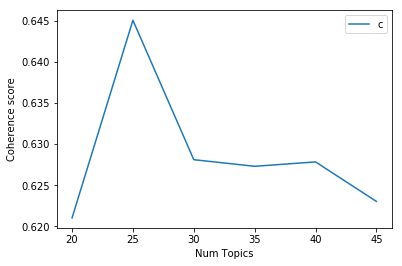

In [90]:
limit=50; start=20; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

next print coherence value for model

In [91]:
for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 20  is having Coherence Value of 0.621
Num Topics = 25  is having Coherence Value of 0.6451
Num Topics = 30  is having Coherence Value of 0.6281
Num Topics = 35  is having Coherence Value of 0.6273
Num Topics = 40  is having Coherence Value of 0.6278
Num Topics = 45  is having Coherence Value of 0.623


we can see that the coherence value is dropping at 30 subjects. Now let's try to get the number of subjects a bit more precise

In [96]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus, texts=data_lemmatized, 
   start=20, limit=30, step=1
)


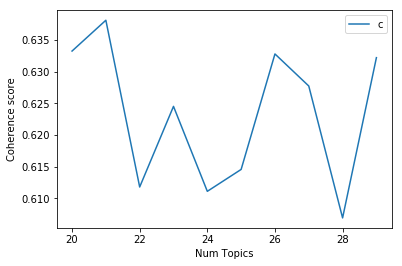

In [97]:
limit=30; start=20; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [98]:
for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 20  is having Coherence Value of 0.6332
Num Topics = 21  is having Coherence Value of 0.6381
Num Topics = 22  is having Coherence Value of 0.6118
Num Topics = 23  is having Coherence Value of 0.6245
Num Topics = 24  is having Coherence Value of 0.6111
Num Topics = 25  is having Coherence Value of 0.6146
Num Topics = 26  is having Coherence Value of 0.6328
Num Topics = 27  is having Coherence Value of 0.6277
Num Topics = 28  is having Coherence Value of 0.6069
Num Topics = 29  is having Coherence Value of 0.6322


Now let's run the model with the best number of subject and make a vis object

In [99]:
ldamallet = gensim.models.wrappers.LdaMallet(
   mallet_path, corpus=bow_corpus, num_topics=21, id2word=didi
)
pprint(ldamallet.show_topics(formatted=False))

[(15,
  [('游戏', 0.01950902099970423),
   ('网', 0.011511387163561076),
   ('微博', 0.008955930198166224),
   ('奥运会', 0.007761017450458444),
   ('取消', 0.006743566992014197),
   ('经营', 0.0065542738834664304),
   ('回复', 0.006506950606329488),
   ('体育', 0.00642413487133984),
   ('体坛', 0.006376811594202898),
   ('东京', 0.005891748003549246)]),
 (19,
  [('日记', 0.006438556511683276),
   ('写', 0.00444882827114724),
   ('喜欢', 0.0033468249379272814),
   ('声音', 0.002700588415360022),
   ('记录', 0.002686983435937553),
   ('情绪', 0.00266657596680385),
   ('也许', 0.0022720315635522603),
   ('感到', 0.0022414203598517058),
   ('依然', 0.00217679670759498),
   ('相信', 0.0021257780347607226)]),
 (18,
  [('韩国', 0.01697840687513541),
   ('下降', 0.008911677619701018),
   ('杂志', 0.008593919260489637),
   ('新增', 0.008102838159890229),
   ('增长', 0.006347945403336463),
   ('图', 0.00587130786451939),
   ('国内', 0.0058207553982812165),
   ('％', 0.005524662381743338),
   ('大邱', 0.005344117859464144),
   ('教会', 0.0048385931970

In [102]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=21, iterations=1000, workers = 4, id2word=id2word)

model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)

vis = pyLDAvis.prepared_data_to_html(vis)

with open("LDA_output.html", "w") as file:
    file.write(vis)

/home/bilatli/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:236: RuntimeWarning: divide by zero encountered in log
  log_1 = np.log(pd.eval("(topic_given_term.T / topic_proportion)"))
/home/bilatli/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:236: RuntimeWarning: invalid value encountered in log
  log_1 = np.log(pd.eval("(topic_given_term.T / topic_proportion)"))
/home/bilatli/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:259: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(pd.eval("topic_term_dists / term_proportion")).astype("float64")
/home/bilatli/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:259: RuntimeWarning: invalid value encountered in log
  log_lift = np.log(pd.eval("topic_term_dists / term_proportion")).astype("float64")
/home/bilatli/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:260: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists).astype("float64")